In [1]:
import numpy as np
import os
import pypianoroll
from pypianoroll import Multitrack, Track
from matplotlib import pyplot as plt

### Converter musicas em "pypianoroll" e separar tracks do tipo "Guitar" em uma lista

In [18]:
music_files = []

for root, subFolders, files in os.walk(os.path.realpath("lpd_5")):
    if files:
        music_files.append(root + "/" + files[0])

In [19]:
_range = 500
pypianoroll_musics = []

for music in music_files[:_range]:
    pypianoroll_musics.append(pypianoroll.load(music))

In [50]:
guitar_tracks = []
tempo_song = [] # to rebuild midi file, with Multitrack API from Pypianoroll

for music in pypianoroll_musics:
    for track in music.tracks:
        if track.name == 'Guitar':
            if len(track.pianoroll) > 0: 
                guitar_tracks.append(track) 
                tempo_song.append(music.tempo)

In [21]:
guitar_tracks[0].pianoroll

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

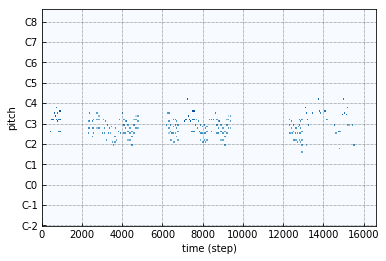

In [22]:
fig = guitar_tracks[0].plot()
plt.show()

### Redimensionar as músicas de modo que elas tenham tamanho de compasso = 10

> Como todas as músicas estão no mesmo tempo (4/4), cada compasso terá 4 notas. O dataset já veio formatado de modo que a duração das notas, para cada compasso, possuem 96 steps. Ou seja, cada nota possui uma duração (beat_resolution) igual a 24, pois 24 x 4 = 96

> Portanto, a fim de se possuir musicas pequenas para testes rapidos, formataremos nosso dataset de modo que cada música contenha apenas 10 compassos

In [23]:
def formatSongs(musics):
    for m in musics:
        m.pianoroll = m.pianoroll[384:1344,:] # faixa de steps para Nº compassos == 10

In [24]:
formatSongs(guitar_tracks)

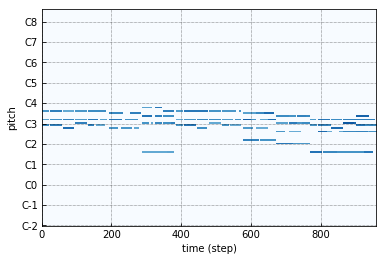

960


In [25]:
fig = guitar_tracks[6].plot()
plt.show()
print(len(guitar_tracks[6].pianoroll))

> Separar, para cada enconder, a respectiva lista dos compassos das musicas a serem codificados. A ordem dos elementos das listas, para os diversos enconders do dicionario, ira respeitar a ordem dos compassos das musicas.

In [26]:
compasses_array = []

for track in guitar_tracks:
    music = track.pianoroll
    compass_array = []
    for compass in range(10):
        left_limit = 96 * compass
        right_limit = 95 + 96 * compass
        compass_array.append(music[left_limit : right_limit])
        #music_encoder_mapper['e{}'.format(compass)].append(music[left_limit : right_limit])
        
    compasses_array.append(compass_array)

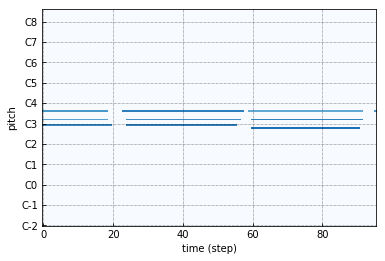

In [32]:
fig = guitar_tracks[6][:96].plot()
plt.show()

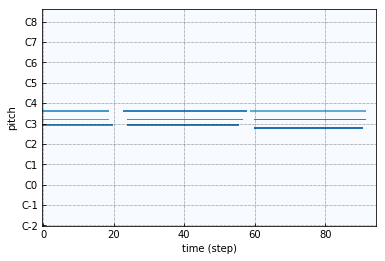

In [81]:
track = Track(pianoroll = compasses_array[6][0], program=0, is_drum=False,
              name=' ')

fig = track.plot()
plt.show()

> Função paara transformar um array de volta em um pypianoroll

In [92]:
def toPypianoroll(created_music, music_index, pypianoroll_musics):
    music = pypianoroll_musics[music_index]
    tempo = music.tempo
    downbeat = music.downbeat
    beat_resolution = music.beat_resolution
    name = music.name
    
    pypianoroll_music = Track(pianoroll = created_music, program=0, is_drum=False,
              name='Guitar')
    
    return Multitrack(tracks = [pypianoroll_music], tempo = tempo, downbeat = downbeat,
        beat_resolution = beat_resolution, name = name)